# 5. Chi-Square

In [28]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('titanic.csv')

In [30]:
df = df[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]

In [31]:
ct = pd.crosstab(df['Survived'],df['Sex'],margins=True)
ct

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [32]:
from scipy.stats import chi2_contingency
print(chi2_contingency(ct))

Chi2ContingencyResult(statistic=np.float64(263.05057407065567), pvalue=np.float64(1.0036732821369115e-55), dof=4, expected_freq=array([[193.47474747, 355.52525253, 549.        ],
       [120.52525253, 221.47474747, 342.        ],
       [314.        , 577.        , 891.        ]]))


In [33]:
score = []

for feature in df.columns[:-1]:
    
    # create contingency table
    ct = pd.crosstab(df['Survived'], df[feature])
    
    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

<Axes: >

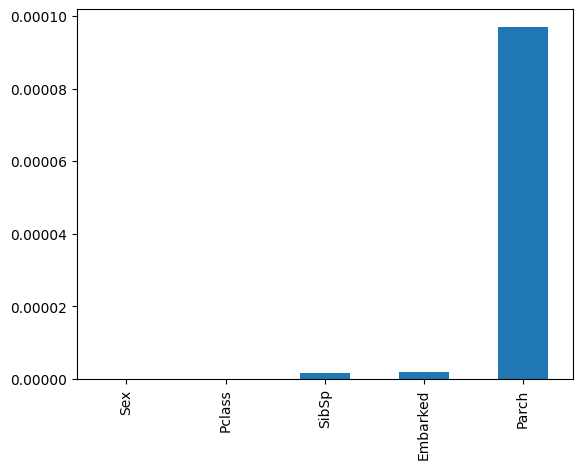

In [34]:
pd.Series(score, index=df.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

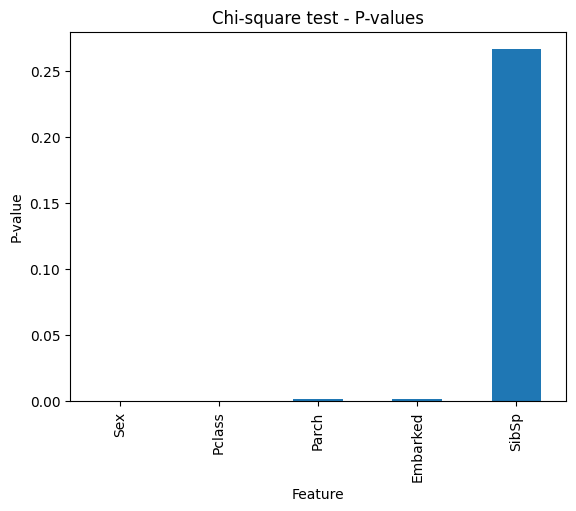

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# assuming titanic is your DataFrame and 'Survived' is the target column

# Encode categorical variables
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']

# Calculate chi-squared stats
chi_scores = chi2(X, y)

# chi_scores[1] are the p-values of each feature.
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)

# Plotting the p-values
p_values.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()

# 6. Mutual Info 

In [37]:
data = {
    'A': ['a1', 'a2', 'a1', 'a1', 'a2', 'a1', 'a2', 'a2'],
    'B': ['b1', 'b2', 'b2', 'b1', 'b1', 'b2', 'b2', 'b1']
}

df = pd.DataFrame(data)


In [38]:
marginal_prob = pd.crosstab(df['A'], df['B'], margins=True, normalize='all')
marginal_prob


B,b1,b2,All
A,,,
a1,0.25,0.25,0.5
a2,0.25,0.25,0.5
All,0.50,0.50,1.0


In [39]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Compute mutual information
mi = mutual_info_classif(X, y)

# Print mutual information
for i, mi_value in enumerate(mi):
    print(f"Feature {i}: Mutual Information = {mi_value}")


Feature 0: Mutual Information = 0.48385098337139776
Feature 1: Mutual Information = 0.21473153381067722
Feature 2: Mutual Information = 0.9933720299110353
Feature 3: Mutual Information = 0.9778794773751931


In [40]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Create SelectKBest feature selector
selector = SelectKBest(mutual_info_classif, k=2)

# Fit and transform
X_new = selector.fit_transform(X, y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

print(iris.feature_names)
print(cols)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[2 3]
